In [84]:
import os
import pandas as pd
pd.set_option('display.max_columns', None) # show all columns
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('./data/export.csv')

"""
    [-] Patient ID - This field is used to uniquely identify a person.
    [-] Sex - This data item identifies the sex of the patient at diagnosis.
    [-] Laterality - Laterality describes the side of a paired organ or side of the body on which the reportable tumor originated.
    [-] Race/ethnicity - Recode which gives priority to non-white races for persons of mixed races.
    [-] Age recode with <1 year olds - The age recode variable is based on Age at Diagnosis (single-year ages). The groupings used in the age recode variable are determined by the age groupings in the population data. This recode has 19 age groups in the age recode variable (< 1 year, 1-4 years, 5-9 years, ..., 85+ years).    [-] Year of diagnosis - The year of diagnosis is the year the tumor was first diagnosed by a recognized medical practitioner, whether clinically or microscopically confirmed.
    [-] Year of diagnosis - The year of diagnosis is the year the tumor was first diagnosed by a recognized medical practitioner, whether clinically or microscopically confirmed.
    [-] Survival months - Created using complete dates, including days, therefore may differ from survival time calculated from year and month only. For more information, see http://seer.cancer.gov/survivaltime. 
    [-] Sequence number - 
    [-] SEER cause-specific death classification - This variable designates that the person died of their cancer for cause-specific survival. For more information, see http://seer.cancer.gov/causespecific.
    [-] Type of Reporting Source - The Type of Reporting Source identifies the source documents used to abstract the case. This is not necessarily the original document that identified the case; rather, it is the source that provided the best information.
    
    
    ### size
    [-] CS tumor size (2004-2015)
    [-] Tumor Size Summary (2016+)
    [-] EOD 4 - size (1983-1987) - 
    [-] EOD 10 - size (1988-2003) - This item is part of the 10-digit EOD (Item #779). It records the largest dimension of the primary tumor in millimeters. Unknown size=999.
    ###
    
    
    [-] Diagnostic Confirmation - This data item records the best method used to confirm the presence of the cancer being reported. The data item is not limited to the confirmation at thetime of diagnosis; it is the best method of confirmation during the entire course of the disease. 
    [-] Reason no cancer-directed surgery - This data item documents the reason that surgery was not performed.
    [-] First malignant primary indicator - Based on all the tumors in SEER. Tumors not reported to SEER are assumed malignant.
    """
df.drop(df.columns.difference(['Patient ID',
                               'Sex',
                               'Laterality',
                               'Race/ethnicity',
                               'Age recode with <1 year olds',
                               'Year of diagnosis',
                               'Survival months',
                               'Sequence number',
                               'SEER cause-specific death classification',
                               'Type of Reporting Source',
                               'Diagnostic Confirmation',
                               'Reason no cancer-directed surgery',
                               'First malignant primary indicator']), 1, inplace=True)
df = df.rename(columns={"Sex": "gender", 
                   "Laterality": "lung_side",
                   "Age recode with <1 year olds": "age",
                   "Year of diagnosis": "diagnosis_year",
                   "Survival months": "months_survived",
                   "SEER cause-specific death classification": "final_cause_of_death",
                   "Type of Reporting Source": "reporting_source",
                   "Diagnostic Confirmation": "method_used_to_confirm_the_presence_of_the_cancer",
                   "Reason no cancer-directed surgery": "reason_that_surgery_was_not_performed",
                   "First malignant primary indicator": "malignant"})

# lower case all data
df = df.apply(lambda x: x.astype(str).str.lower())

df.loc[df['lung_side'] ==  'right - origin of primary', 'lung_side'] = 'right'
df.loc[df['lung_side'] ==  'left - origin of primary', 'lung_side'] = 'left'

<ipython-input-85-4e718afb5369>:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['Patient ID',


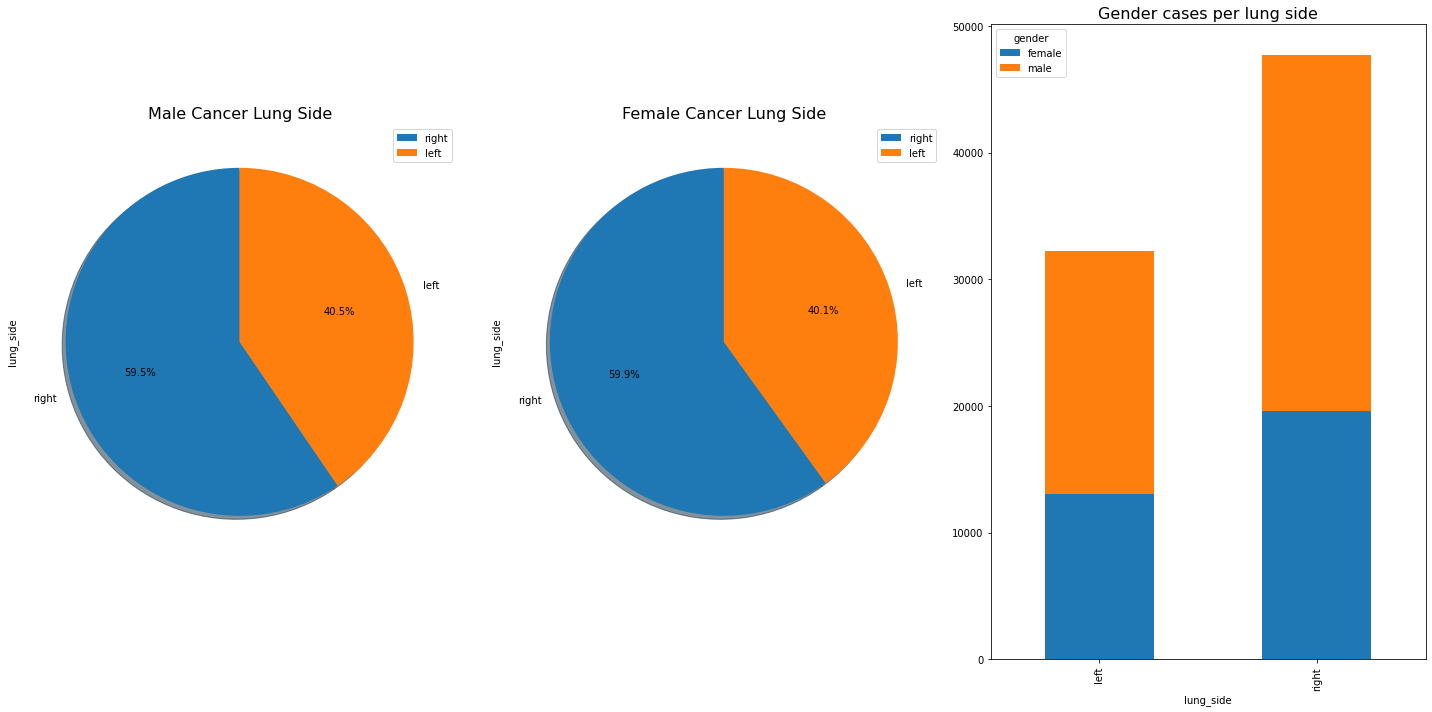

In [86]:
df['lung_side'][df['gender']=='male'].value_counts().to_frame().plot(kind='pie', 
                                                                     y='lung_side', 
                                                                     subplots=True, 
                                                                     shadow = True, 
                                                                     figsize=(20, 20), 
                                                                     autopct='%1.1f%%', 
                                                                     startangle=90, 
                                                                     ax=plt.subplot(131))
plt.title('Male Cancer Lung Side', size=16) 
df['lung_side'][df['gender']=='female'].value_counts().to_frame().plot(kind='pie', 
                                                                       y='lung_side', 
                                                                       subplots=True, 
                                                                       shadow = True, 
                                                                       figsize=(20, 20), 
                                                                       autopct='%1.1f%%',
                                                                       startangle=90, 
                                                                       ax=plt.subplot(132))
plt.title('Female Cancer Lung Side', size=16) 
df.groupby(['gender', 'lung_side']).size().reset_index().pivot(columns='gender', 
                                                               index='lung_side', 
                                                               values=0).plot(kind='bar', 
                                                                              stacked=True, 
                                                                              figsize=(20, 10),
                                                                              ax=plt.subplot(133))
plt.title('Gender cases per lung side', size=16)
plt.tight_layout()
plt.show()